<a href="https://colab.research.google.com/github/shemanto27/Spam-Comments-Detection-Using-NLP/blob/main/Spam_Comment_Detection_Using_NLP_and_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# About the Dataset:
📌Dataset is collected from Kaggle: [YouTube Spam Collection Data Set](https://www.kaggle.com/datasets/lakshmi25npathi/images). It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.
#My Planning:
I will use this dataset to train a ML model to detect spam comment and **use this model in my Django Blog website's comment section to detect spam comments.** Although it is would be better if I use blog spam comment data to build an model but it is a practice purpose and I didn't find dataset available on blog spam comment.

 > **Spam comments will be keep on holds to get reviewed by the admin and if it is permitted then it will be visible for the other reader of the blog.**

 > [Checkout my Django Project](https://github.com/shemanto27/Django-Blog-Website)


### Step-1: Import the librarys and data cleaning

In [128]:
#------- python librarys
import pandas as pd
import numpy as np

#--------- EDA
import matplotlib.pyplot as plt

# --------text preprocessing
# ! pip install nltk
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# --------Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# --------Evaluation
from sklearn.metrics import confusion_matrix, classification_report

#---------Model Generation
import pickle




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
psy_data = pd.read_csv('/content/drive/MyDrive/Data for ML/Spam comment data/Youtube01-Psy.csv')
psy_data.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [130]:
# data exploration
psy_data.info()
# checking null value
psy_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64

In [131]:
# getting the columns I need for training and drops the rest
psy_data = psy_data[['CONTENT', 'CLASS']]
psy_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [132]:
kp_data = pd.read_csv('/content/drive/MyDrive/Data for ML/Spam comment data/Youtube02-KatyPerry.csv')
lmfo_data = pd.read_csv('/content/drive/MyDrive/Data for ML/Spam comment data/Youtube03-LMFAO.csv')
eminem_data = pd.read_csv('/content/drive/MyDrive/Data for ML/Spam comment data/Youtube04-Eminem.csv')
sakira_data = pd.read_csv('/content/drive/MyDrive/Data for ML/Spam comment data/Youtube05-Shakira.csv')

#apending all column
df = pd.concat([kp_data, lmfo_data, eminem_data, sakira_data], axis=0)
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [133]:
df = df[['CONTENT', 'CLASS']]
df.head()

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [134]:
#final dataframe of all data
df = pd.concat([psy_data, df], axis=0)
df.head(10)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,"Hey, check out my new website!! This site is a...",1
6,Subscribe to my channel ﻿,1
7,i turned it on mute as soon is i came on i jus...,0
8,You should check my channel for Funny VIDEOS!!﻿,1
9,and u should.d check my channel and tell me wh...,1


In [135]:
# finding null value
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [136]:
#finding duplicated values
df.duplicated().sum()

196

In [137]:
#droping duplicated value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [138]:
#final shape of the data
df.shape

(1760, 2)

###Step-2: EDA

In [139]:
df['CLASS'].value_counts()

CLASS
0    919
1    841
Name: count, dtype: int64

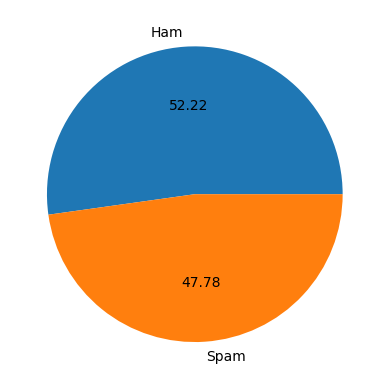

In [140]:
#piechart for seeing data distribution (Is data imbalanced? Ans:NO)
plt.pie(df['CLASS'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

###Step-3: Text Preprocessing
**Text Preprocessing in NLP**

---


Computers can only process numbers not text data.Text pre-processing is the process of preparing text data so that machines can use it to perform tasks like analysis, predictions, etc.

**Steps of text preprocessing:**


---


- **Lower case:** The **lower()** method returns a string where all characters are lower case.

- **Tokenization:** process of converting a sequence of text into smaller parts, known as tokens.

- **Removing special character:** emojis,(space)!#%&? etc. which are not alphanumeric should be removed.Only the characters that are alphanumeric, meaning alphabet letter (a-z) and numbers (0-9) should be taken.String method **isalnum()** check if all the characters in the text are alphanumeric.Returns True if all the characters are alphanumeric

- **Removing stop words:** These are the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

- **punctuation:** while essential for human readability and comprehension, often adds minimal semantic value when processing text through algorithms. For instance, periods, commas, and question marks do not usually contribute to the understanding of the topic or sentiment of a text, and in many computational tasks, they can be considered noise.

- **Stemming:** a method in text processing that eliminates prefixes and suffixes from words, transforming them into their fundamental or root form.For example, “chocolates” becomes “chocolate” and “retrieval” becomes “retrieve.”



---



> Natural language processing (NLP) is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.

> Before you can analyze that data programmatically, you first need to preprocess it.For this kinds of text preprocessing tasks you can do with NLTK.

> [Read This Article on NLTK and Text Preprocessing](https://realpython.com/nltk-nlp-python/)


In [141]:
# creating function to do all the preprocessing all at once
def transform_text(text):
  text = text.lower() #lower case

  text = word_tokenize(text) #tokenization

# Removing special character
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

# Removing stopwords and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

# Stemming
  for i in text:
    y.append(stemmer.stem(i))
  text = y[:]
  y.clear()


  return " ".join(text) # joing all words in list to a string

In [142]:
# testing preprocessing with test sentence
transform_text('Hello Everyone! How are YOu? 👋')
# stemmer.stem('going')

'hello everyon'

In [143]:
df['CONTENT'][0].apply(transform_text)

0             huh anyway check tube channel kobyoshi02
0    love much also gener free lead auto pilot amp ...
0                                        http amp best
0                                       love girl talk
Name: CONTENT, dtype: object

In [144]:
# transforming all rows of CONTENT column and creating a new column in the dataframe to store the transformed sentences
df['transformed_content'] = df['CONTENT'].apply(transform_text)
df.head()

,CONTENT,CLASS,transformed_content
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,hey guy check new channel first vid us monkey ...
2,just for test I have to say murdev.com,1,test say
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shake sexi ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch check


###Step-4: Model building

**Word Embedding and Text Vectorization**

---
**Word Embeddings** are the texts converted into numbers and there may be different numerical representations of the same text.Machine Learning algorithms are not capable of processing strings or plain text in their raw form.They require numerical numbers as inputs to perform any sort of task.

Also, from the huge amount of data that is present in the text format, it is imperative to extract some knowledge out of it and build any useful applications.

To convert the text data into numerical data, we need some smart ways which are known as **vectorization**, or in the NLP world, it is known as **Word embeddings**.

**Some vectorization techniques**

---

- One-hot Encoding (OHE)
- Count Vectorizer
- Bag-of-Words (BOW)
- N-grams
- Term Frequency-Inverse Document Frequency (TF-IDF)

> **We will be using TF-IDF based Verctorizer in this project**


> [Read More about Text Vectorization](https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/)




In [145]:
# spliting the tain test data
X_train, X_test, y_train, y_test = train_test_split(df['transformed_content'], df['CLASS'], test_size=0.2, random_state=2)

In [146]:
# X_train Shape
X_train.shape

(1408,)

In [147]:
#TF-IDF Vectorizer
tf_idf = TfidfVectorizer()
X_train_tfidf = tf_idf.fit_transform(X_train)

In [148]:
#new shape of X_train
X_train_tfidf.shape

(1408, 2510)

In [149]:
# Model Training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [150]:
# Vectorization on test set for evaluation, we do not need to fit the model using this data so we only call transform
X_test_tfidf = tf_idf.transform(X_test)
prediction = model.predict(X_test_tfidf)
prediction

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,

###Step-5: Evaluation

In [151]:
# Confusion Matrix for model evaluation
confusion_matrix(y_test, prediction)

array([[168,  14],
       [ 18, 152]])

In [152]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       182
           1       0.92      0.89      0.90       170

    accuracy                           0.91       352
   macro avg       0.91      0.91      0.91       352
weighted avg       0.91      0.91      0.91       352



###Step-6: Improvement


### Step-7: Model Generation

In [153]:
with open('spam_model.pkl', 'wb') as file:
  pickle.dump(model, file)